<font size="4"> <b> • DOMAIN: </b>Botanical Research</font>

<font size="4"> <b> • CONTEXT: </b>University X is currently undergoing some research involving understanding the characteristics of flowers. They already have invested on curating sample images. They require an automation which can create a classifier capable of determining a flower’s 
species from a photo.

<font size="4"> <b> • DATA DESCRIPTION: </b>The dataset comprises of images from 17 plant species



<font size="4"> <b> • PROJECT OBJECTIVE: </b> To experiment with various approaches to train an image classifier to predict type of flower from the image

<b>Steps and tasks: [ Total Score: 30 Marks]</b>
    
<b>1. Import and Understand the data [5 Marks]</b>

>A. Import and read oxflower17 dataset from tflearn and split into X and Y while loading. [2 Marks]

><i>Hint: It can be imported from tflearn.datasets. If tflearn is not installed, install it. It can be loaded using: x, y = oxflower17.load_data() </i>

>B. Print Number of images and shape of the images. [1 Marks]

>C. Print count of each class from y. [2 Marks]

<b>2. Image Exploration & Transformation [Learning purpose - Not related to final model] [10 Marks]</b>

>A. Display 5 random images. [1 Marks]

>B. Select any image from the dataset and assign it to a variable. [1 Marks]

>C.  Transform the image into grayscale format and display the same. [3 Marks]

>D. Apply a filter to sharpen the image and display the image before and after sharpening. [2 Marks]

>E. Apply a filter to blur the image and display the image before and after blur. [2 Marks]

>F. Display all the 4 images from above questions besides each other to observe the difference. [1 Marks]

<b>3. Model training and Tuning: [15 Marks]</b>

>A. Split the data into train and test with 80:20 proportion. [2 Marks]

>B. Train a model using any Supervised Learning algorithm and share performance metrics on test data. [3 Marks]

>C. Train a model using Neural Network and share performance metrics on test data. [4 Marks]

>D. Train a model using a basic CNN and share performance metrics on test data. [4 Marks]

>E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label. [2 Marks]

 </font>


<font size="5"><p style="color:black"> <b> 1. Import and Understand the data </p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b>A. Import and read oxflower17 dataset from tflearn and split into X and Y while loading. </b>

* The oxflower17 dataset requires tensorflow version 1.0x but many of the packages are not able to run because of this and also the part A computer vision project also uses tensor flow 2.0x hence it isnt incovenient to use "%tensorflow_version 1.x" and reset runtime to change from 2.0x to 1.0x.

* Have kept the code hashed but due to it being depreciated, this is the only ideal way to proceed

In [58]:
import tensorflow as tf
from tensorflow import keras
#import tflearn.datasets.oxflower17 as oxflower17 (This dataset requires tensorflow x1.0, )
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import load_npz
import cv2

In [59]:
# Have downloaded using the following code

# np.savez_compressed('oxflower17', x=x, y=y)

# it got saved in '.npz' which is uploaded into google drive and retrieved as follows

In [60]:
path = '/content/drive/MyDrive/Colab Notebooks/oxflower17.npz'
with np.load(path) as data:
  x = data['x']
  y = data['y']

In [61]:
#%tensorflow_version 1.x

In [62]:
#x, y = oxflower17.load_data(resize_pics=(224,224))
#x.shape, y.shape

In [63]:
#data = np.load("oxflower17.npz")
#x = data["x"]
#y = data["y"]

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b>B. Print Number of images and shape of the images. </b>

In [64]:
print('Total number of images',x.shape[0])
print('Image Shape',x.shape[1:3])
print('Number channel:',x.shape[3])
print('Image shape',x.shape)
print('Target count',y.shape)

Total number of images 1360
Image Shape (224, 224)
Number channel: 3
Image shape (1360, 224, 224, 3)
Target count (1360,)


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b>C. Print count of each class from y. </b>

One hot encoding label dataframe to get a 2d array, However, we will be using integer array for our model

In [65]:
from tensorflow.keras.utils import to_categorical
encoded_y = to_categorical(y)
encoded_y.shape

(1360, 17)

In [66]:
encoded_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Converting array to dataframe for better visualization

In [67]:
temp_y = pd.DataFrame(encoded_y)
temp_y

0    1    2    3    4    5    6   ...   10   11   12   13   14   15   16
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0
4     0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
1355  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0
1356  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1357  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0
1358  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1359  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[1360 rows x 17 columns]

In [68]:
temp_y1 = pd.DataFrame(y)
temp_y1

0
0      7
1     11
2     16
3     16
4      2
...   ..
1355  11
1356   2
1357  11
1358   2
1359   4

[1360 rows x 1 columns]

printing the count of each class from every column of the label dataset

In [69]:
for i in range(0,17):
    dup_count = temp_y.pivot_table(columns=[i], aggfunc='size')
    print (dup_count,'\n')

0
0.0    1280
1.0      80
dtype: int64 

1
0.0    1280
1.0      80
dtype: int64 

2
0.0    1280
1.0      80
dtype: int64 

3
0.0    1280
1.0      80
dtype: int64 

4
0.0    1280
1.0      80
dtype: int64 

5
0.0    1280
1.0      80
dtype: int64 

6
0.0    1280
1.0      80
dtype: int64 

7
0.0    1280
1.0      80
dtype: int64 

8
0.0    1280
1.0      80
dtype: int64 

9
0.0    1280
1.0      80
dtype: int64 

10
0.0    1280
1.0      80
dtype: int64 

11
0.0    1280
1.0      80
dtype: int64 

12
0.0    1280
1.0      80
dtype: int64 

13
0.0    1280
1.0      80
dtype: int64 

14
0.0    1280
1.0      80
dtype: int64 

15
0.0    1280
1.0      80
dtype: int64 

16
0.0    1280
1.0      80
dtype: int64 



<font size="5"><p style="color:black"> <b> 2. Image Exploration & Transformation [Learning purpose - Not related to final model]</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b>A. Display 5 random images.</b>

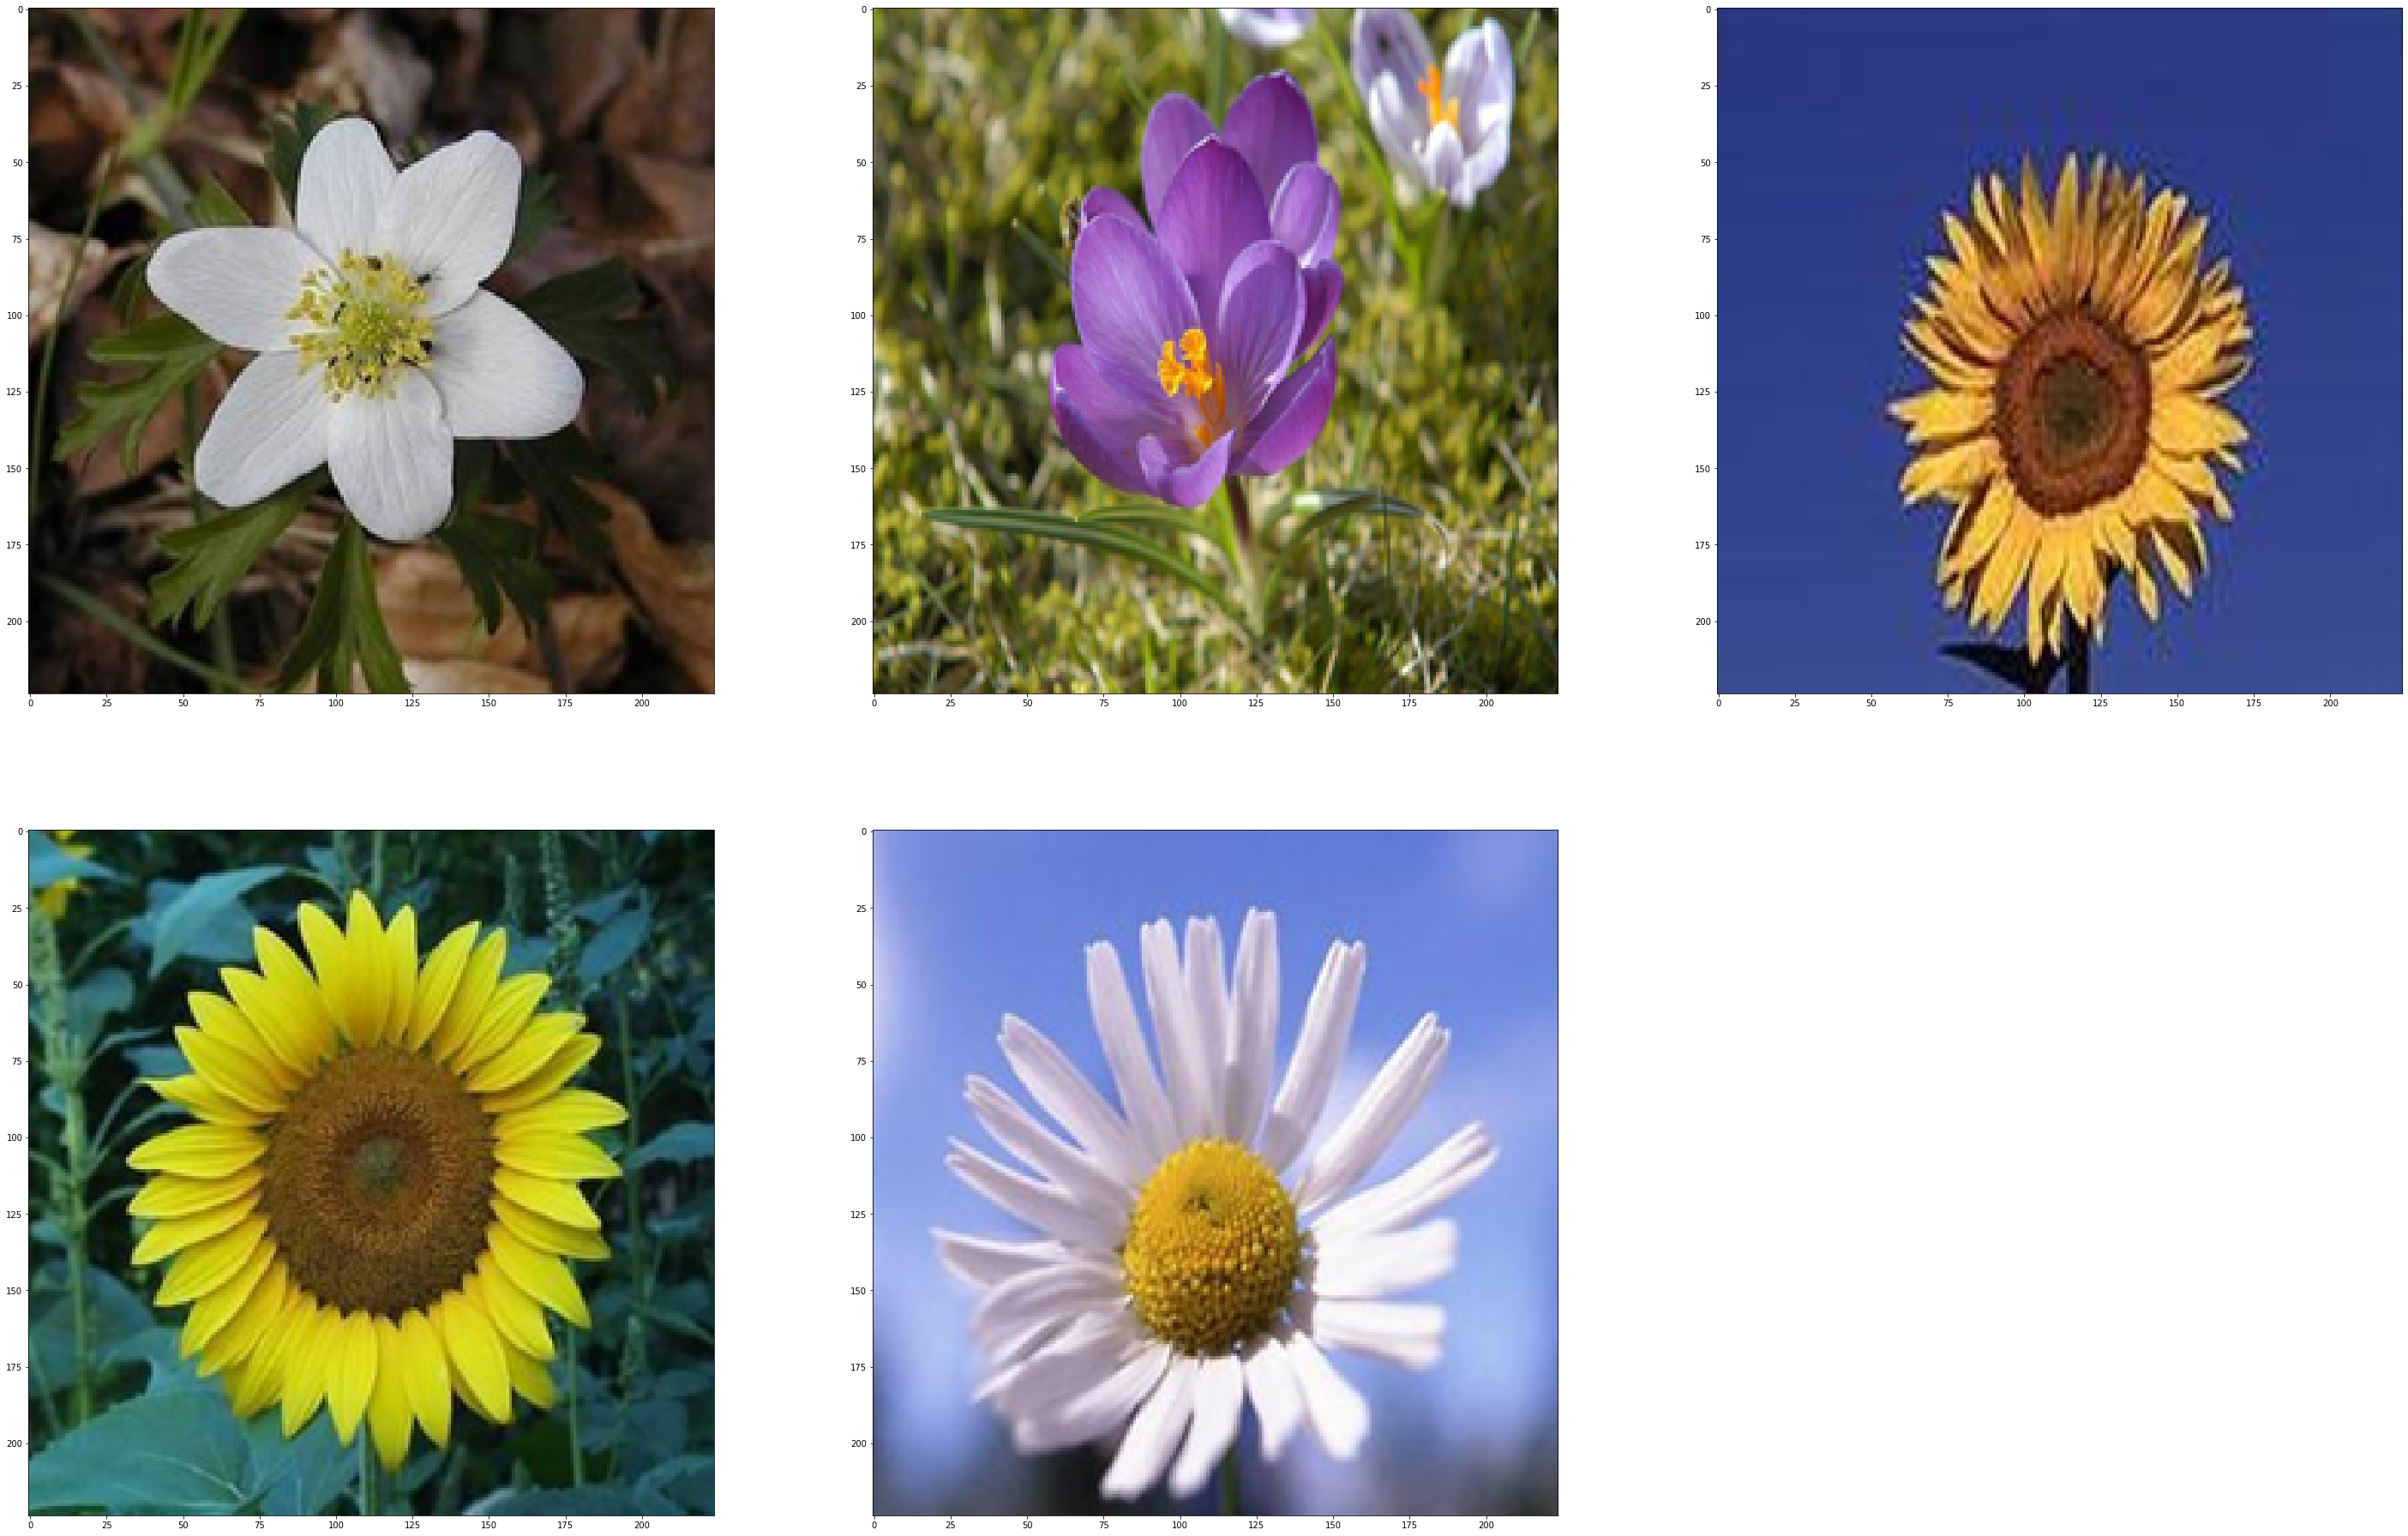

In [70]:
plt.figure(figsize = (50,50)) 
def random(n):
    for i in range(0,n):
        plt.subplot(3, 3, i + 1)
        plt.imshow(x[i])
    
random1 = random(5)
random1

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b>B. Select any image from the dataset and assign it to a variable.  </b>

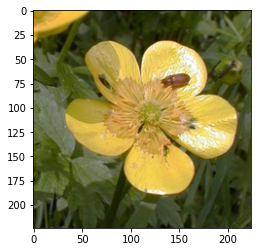

In [71]:
image1 = x[32]
plt.imshow(image1)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b>C. Transform the image into grayscale format and display the same</b>

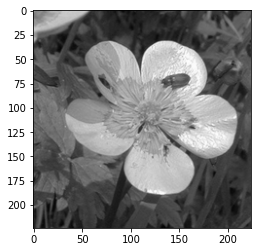

In [72]:
import matplotlib.image as mpimg

def rgb_to_gray(img):
        grayImage = np.zeros(img.shape)
        R = np.array(img[:, :, 0])
        G = np.array(img[:, :, 1])
        B = np.array(img[:, :, 2])

        R = (R *.299)
        G = (G *.587)
        B = (B *.114)

        Avg = (R+G+B)
        grayImage = img.copy()

        for i in range(3):
           grayImage[:,:,i] = Avg
           
        return grayImage        
    
grayImage = rgb_to_gray(image1)  
plt.imshow(grayImage)

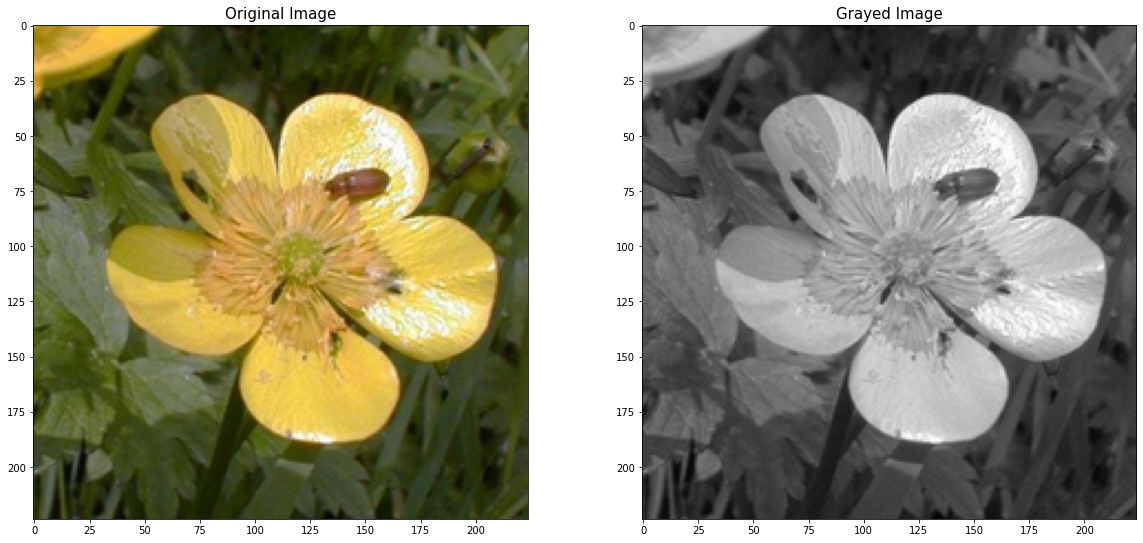

In [73]:
plt.figure(figsize = (20,20)) 
ax1 = plt.subplot(2,2,1);
plt.title('Original Image',fontsize = 15)
plt.imshow(image1)

ax2 = plt.subplot(2,2,2);
plt.title('Grayed Image',fontsize = 15)
plt.imshow(grayImage)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b>D. Apply a filter to sharpen the image and display the image before and after sharpening</b>

In [74]:
def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 2, image_blurred, -0.5, 0)
    return image_sharp

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


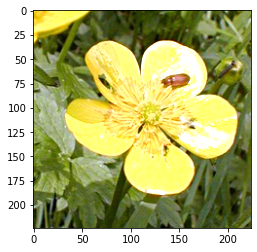

In [75]:
sharpen_image = sharpen_image(image1)
plt.imshow(sharpen_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


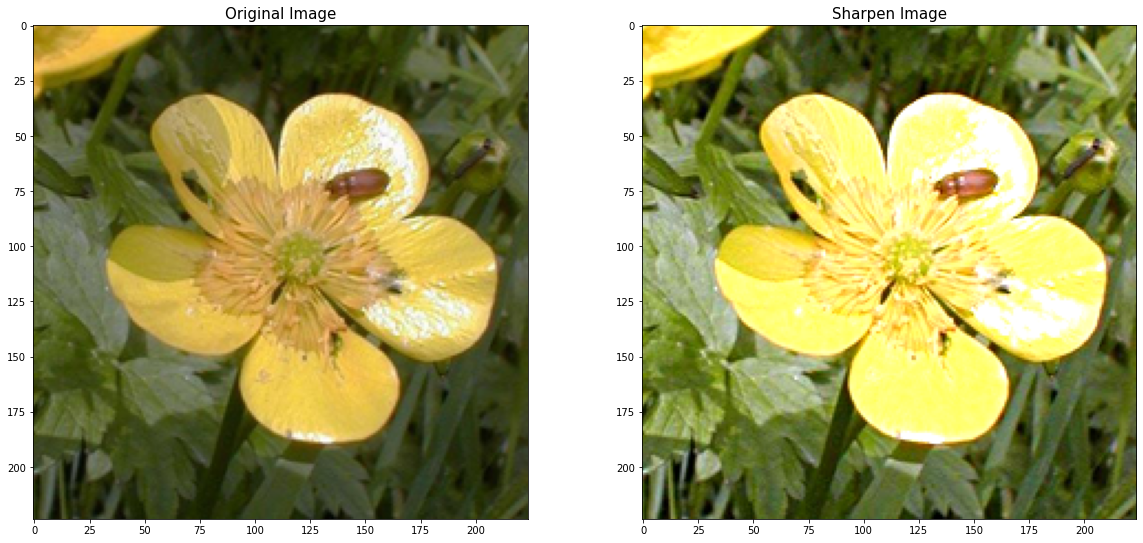

In [76]:
plt.figure(figsize = (20,20)) 
ax1 = plt.subplot(2,2,1);
plt.title('Original Image',fontsize = 15)
plt.imshow(image1)

ax2 = plt.subplot(2,2,2);
plt.title('Sharpen Image',fontsize = 15)
plt.imshow(sharpen_image)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b>E. Apply a filter to blur the image and display the image before and after blur. </b>

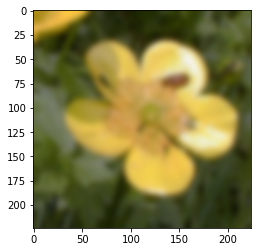

In [77]:
def image_blurred(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    return image_blurred


blur_image = image_blurred(image1)
plt.imshow(blur_image)

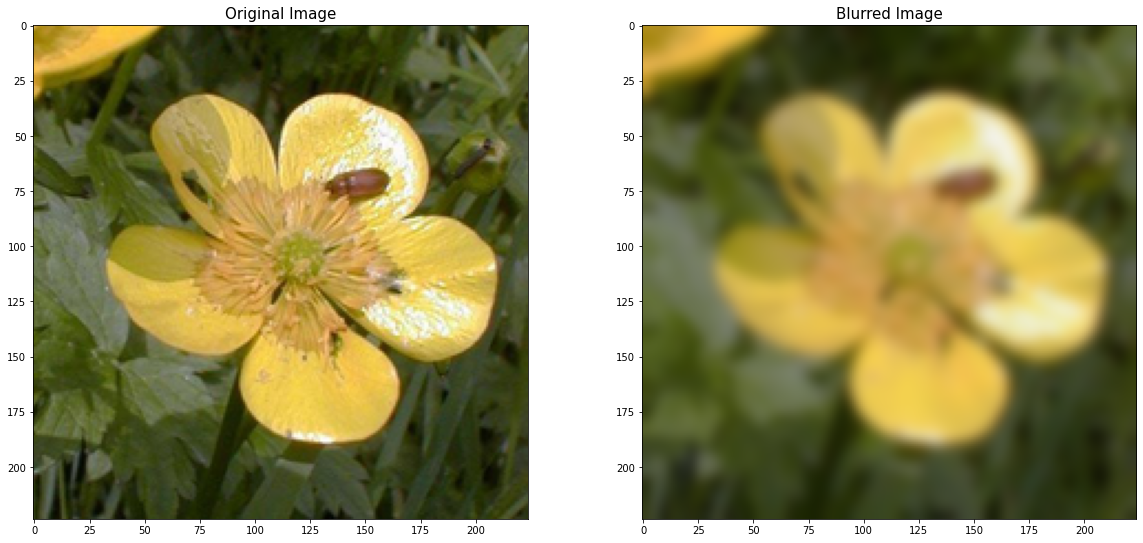

In [78]:
plt.figure(figsize = (20,20)) 
ax1 = plt.subplot(2,2,1);
plt.title('Original Image',fontsize = 15)
plt.imshow(image1)

ax2 = plt.subplot(2,2,2);
plt.title('Blurred Image',fontsize = 15)
plt.imshow(blur_image)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b>F. Display all the 4 images from above questions besides each other to observe the difference.</b>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


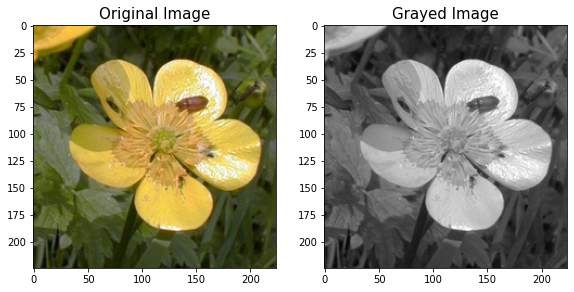

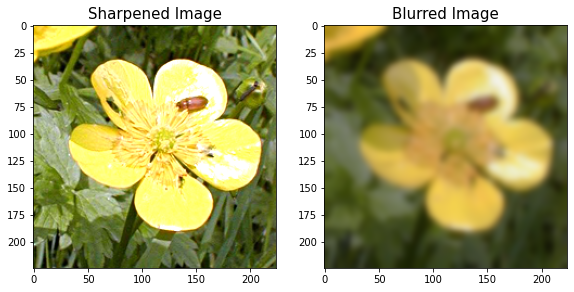

In [79]:
plt.figure(figsize = (20,20)) 
ax1 = plt.subplot(1,4,1);
plt.title('Original Image',fontsize = 15)
plt.imshow(image1)

ax2 = plt.subplot(1,4,2);
plt.title('Grayed Image',fontsize = 15)
plt.imshow(grayImage)

plt.figure(figsize = (20,20)) 
ax1 = plt.subplot(1,4,3);
plt.title('Sharpened Image',fontsize = 15)
plt.imshow(sharpen_image)

ax2 = plt.subplot(1,4,4);
plt.title('Blurred Image',fontsize = 15)
plt.imshow(blur_image)

<font size="5"><p style="color:black"> <b> 3. Model training and Tuning: </p></font>

In [80]:
imgsp = temp_y1

In [81]:
imgsp

0
0      7
1     11
2     16
3     16
4      2
...   ..
1355  11
1356   2
1357  11
1358   2
1359   4

[1360 rows x 1 columns]

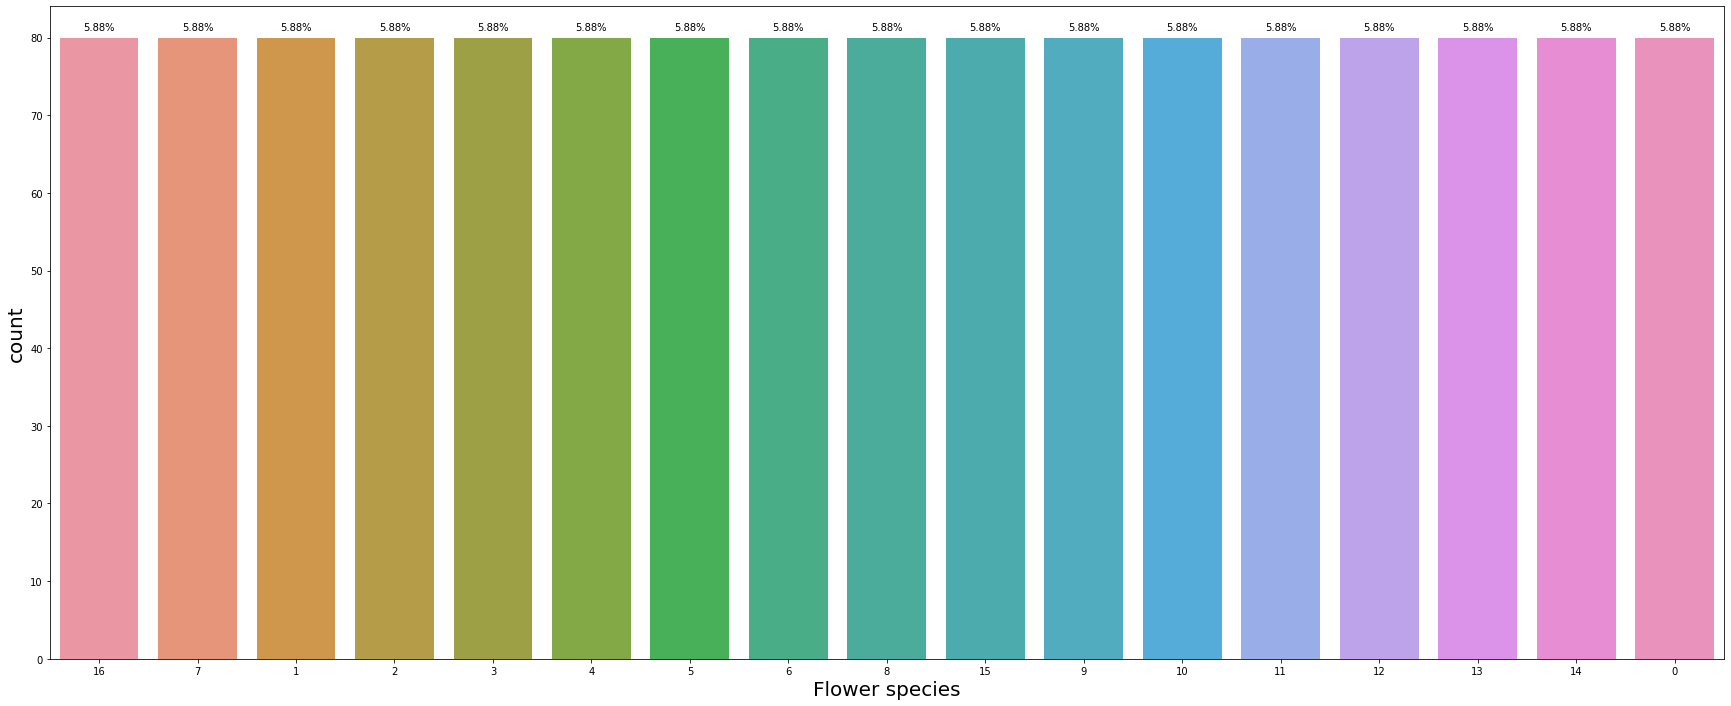

In [82]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(4,4))
width = len(imgsp[0].unique()) + 13
fig.set_size_inches(width , 12)
ax=sns.countplot(data = imgsp, x= 0,order = imgsp[0].value_counts().index)
plt.xlabel("Flower species",fontsize=20)
plt.ylabel("count", fontsize=20)
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(imgsp)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b>A. Split the data into train and test with 80:20 proportion.</b>

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, test_size=0.2, random_state = 12)

In [84]:
# Checking shape of Train dataset (80%)
print(x_train.shape) 
print(y_train.shape) 

(1088, 224, 224, 3)
(1088,)


In [85]:
# Checking shape of Test dataset (20%)
print(x_test.shape)
print(y_test.shape)

(272, 224, 224, 3)
(272,)


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b>B. Train a model using any Supervised Learning algorithm and share performance metrics on test data.</b>

Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier

Flattening the train and test images to perform image classification 

In [87]:
# Train data
x_train_sl = []
for i in range(1088):
      x_train_sl.append(x_train[i,:].flatten())

# Test data
x_test_sl = []
for i in range(272):
      x_test_sl.append(x_test[i,:].flatten())

In [88]:
y_train.shape

(1088,)

In [89]:
y_test.shape

(272,)

In [90]:
np.shape(x_test_sl)

(272, 150528)

In [91]:
np.shape(x_train_sl)

(1088, 150528)

Hyperparameter tuning manually for better accuracy score

In [92]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

rf = RandomForestClassifier()
rf.fit(x_train_sl, y_train)

RandomForestClassifier()

Accuracy score metrics for Random Forest Classifier Supervised Learning model

In [93]:
prediction_rf_tuned_train = rf.predict(x_train_sl)
prediction_rf_tuned_test = rf.predict(x_test_sl)

rf_tunedtrain = metrics.accuracy_score(y_train, prediction_rf_tuned_train)
rf_tunedtest = metrics.accuracy_score(y_test, prediction_rf_tuned_test)

In [94]:
resultsDf1 = pd.DataFrame({'Method':['Random Forest Classifier'], 'accuracy_Train': [rf_tunedtrain],'accuracy_Test': [rf_tunedtest]})
resultsDf1

Method  accuracy_Train  accuracy_Test
0  Random Forest Classifier             1.0       0.474265

* Train accuracy is 100% while Test accuracy is 47.4%, this indicates overfitting of the model. Even on parameter tuning, the overfit zone isnt reducing

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b>C. Train a model using Neural Network and share performance metrics on test data. </b>

Reshaping the train and test dataset for neural network model

In [95]:
nn_train_x=x_train.reshape(1088,150528)
nn_test_x=x_test.reshape(272,150528)

Normalizing the train and test dataset for neural network model

In [96]:
nn_train_X = nn_train_x/255.0
nn_test_X = nn_test_x/255.0

Checking the shape of the neural network train and test data

In [97]:
nn_train_X.shape

(1088, 150528)

In [98]:
nn_test_X.shape

(272, 150528)

In [99]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(1088, 17)

In [100]:
y_test = to_categorical(y_test)
y_test.shape

(272, 17)

Creating neural network architecture 

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

def nn_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (150528, )))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(17))
    model.add(Activation('softmax'))
    
    sgd = optimizers.Adam(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

model= nn_model()

model.fit(nn_train_X, y_train, validation_data = (nn_test_X,y_test), epochs=100, batch_size=200, verbose=2)

Epoch 1/100
6/6 - 3s - loss: 2.8322 - accuracy: 0.0781 - val_loss: 2.8150 - val_accuracy: 0.1140 - 3s/epoch - 476ms/step
Epoch 2/100
6/6 - 1s - loss: 2.8040 - accuracy: 0.1075 - val_loss: 2.7771 - val_accuracy: 0.1213 - 1s/epoch - 230ms/step
Epoch 3/100
6/6 - 1s - loss: 2.7548 - accuracy: 0.1176 - val_loss: 2.7132 - val_accuracy: 0.1176 - 1s/epoch - 231ms/step
Epoch 4/100
6/6 - 1s - loss: 2.6765 - accuracy: 0.1379 - val_loss: 2.6458 - val_accuracy: 0.1287 - 1s/epoch - 231ms/step
Epoch 5/100
6/6 - 1s - loss: 2.5849 - accuracy: 0.1287 - val_loss: 2.5532 - val_accuracy: 0.1360 - 1s/epoch - 230ms/step
Epoch 6/100
6/6 - 1s - loss: 2.4866 - accuracy: 0.1333 - val_loss: 2.4566 - val_accuracy: 0.1544 - 1s/epoch - 229ms/step
Epoch 7/100
6/6 - 1s - loss: 2.3778 - accuracy: 0.1994 - val_loss: 2.3613 - val_accuracy: 0.1728 - 1s/epoch - 232ms/step
Epoch 8/100
6/6 - 1s - loss: 2.2664 - accuracy: 0.2335 - val_loss: 2.2613 - val_accuracy: 0.1912 - 1s/epoch - 234ms/step
Epoch 9/100
6/6 - 1s - loss: 2.1

Summary of model architecture

In [102]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                7526450   
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 activation_2 (Activation)   (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 50)               

Accuracy metrics of the Neural Network model

In [103]:
train_accuracy= model.evaluate(nn_train_X, y_train, verbose=0)
test_accuracy= model.evaluate(nn_test_X, y_test, verbose=0)

print('Train accuracy: ', train_accuracy)
print('Test/Validation accuracy: ',test_accuracy)

Train accuracy:  [0.3419478237628937, 0.9136029481887817]
Test/Validation accuracy:  [1.9285672903060913, 0.45588234066963196]


* Train accuracy is 91.3% while Test accuracy is 45.5%, this indicates overfitting of data. The test data is also saturating between 42-46% accuracy

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b>D. Train a model using a basic CNN and share performance metrics on test data. </b>

In [104]:
x_train.shape

(1088, 224, 224, 3)

In [105]:
y_train.shape

(1088, 17)

In [106]:
x_test.shape

(272, 224, 224, 3)

In [107]:
y_test.shape

(272, 17)

In [108]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1088, 224, 224, 3)
(1088, 17)
(272, 224, 224, 3)
(272, 17)


Data augmentation to reduce overfitting

In [109]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=40, zoom_range = 0.2, width_shift_range=0.2, height_shift_range=0.2,horizontal_flip=True, vertical_flip=True)
datagen.fit(x_train)

CNN Architecture

In [110]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import models, layers, callbacks

        
CNN_model = Sequential()

CNN_model.add(layers.Conv2D(32, (3, 3), input_shape=(224,224,3), activation='relu'))
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(layers.Dropout(0.1))

CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(layers.Dropout(0.1))

CNN_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(layers.Dropout(0.1))

CNN_model.add(layers.Conv2D(256, (3, 3), activation='relu'))
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(layers.Dropout(0.1))

CNN_model.add(layers.Flatten())
CNN_model.add(layers.Dropout(0.4))
CNN_model.add(layers.Dense(512, activation='relu'))
CNN_model.add(layers.Dropout(0.4))

CNN_model.add(layers.Dense(17, activation='softmax'))

CNN architecture layers summary

In [111]:
CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 54, 54, 64)       

Fitting the CNN model with 'adam' optimizer and 'categorical_crossentropy' loss function

In [112]:
from tensorflow.keras.optimizers import Adam

# Compile model
CNN_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    
# Fit the model
hist = CNN_model.fit(datagen.flow(x_train, y_train, batch_size=70), epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
16/16 [==============================] - 134s 8s/step - loss: 2.9283 - accuracy: 0.0754 - val_loss: 2.7509 - val_accuracy: 0.0772
Epoch 2/100
16/16 [==============================] - 133s 8s/step - loss: 2.6015 - accuracy: 0.1131 - val_loss: 2.4710 - val_accuracy: 0.1324
Epoch 3/100
16/16 [==============================] - 130s 8s/step - loss: 2.4578 - accuracy: 0.1379 - val_loss: 2.2854 - val_accuracy: 0.2059
Epoch 4/100
16/16 [==============================] - 135s 8s/step - loss: 2.3267 - accuracy: 0.1728 - val_loss: 2.1492 - val_accuracy: 0.2868
Epoch 5/100
16/16 [==============================] - 131s 8s/step - loss: 2.1959 - accuracy: 0.2270 - val_loss: 1.9609 - val_accuracy: 0.3272
Epoch 6/100
16/16 [==============================] - 134s 8s/step - loss: 2.0707 - accuracy: 0.2555 - val_loss: 1.7541 - val_accuracy: 0.4228
Epoch 7/100
16/16 [==============================] - 131s 8s/step - loss: 1.8777 - accuracy: 0.3438 - val_loss: 1.5596 - val_accuracy: 0.4706
Epoch 

Accuracy metrics of the CNN model

In [113]:
train_accuracy= CNN_model.evaluate(x_train, y_train, verbose=0)
test_accuracy= CNN_model.evaluate(x_test, y_test, verbose=0)

print('Train accuracy: ', train_accuracy)
print('Test/Validation accuracy: ',test_accuracy)

Train accuracy:  [0.292614609003067, 0.8878676295280457]
Test/Validation accuracy:  [0.959616482257843, 0.7389705777168274]


* Train accuracy is 88.7% while Test accuracy is 73.8% which is decent and this performance is sufficient for production. Out of supervised, neural network and CNN, the CNN outperformed all because of its deep layers and compatability with image data.

Pickling the model for future usage

In [122]:
from keras.models import model_from_json

# Pickle model to JSON
classifier_model_json = CNN_model.to_json()
with open("CNN_model.json", "w") as json_file:
    json_file.write(classifier_model_json)
# Pickle weights to HDF5
CNN_model.save_weights("CNN_model.h5")
print("Saved model to disk")


# load json and create model
json_file = open('CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("CNN_model.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b>E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label.</b>

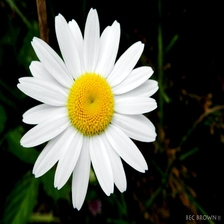

The shape of image to be predicted is:'(224, 224, 3)'
The shape of image to be predicted after expanding the dimensions is:'(1, 224, 224, 3)'


In [125]:
from google.colab.patches import cv2_imshow

img_pred = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Prediction.jpg')
img_pred_resize = cv2.resize(img_pred,(224,224), interpolation = cv2.INTER_CUBIC)
cv2_imshow(img_pred_resize)
img_predict = np.expand_dims(img_pred_resize, axis=0)
print(f"The shape of image to be predicted is:'{img_pred.shape}'")
print(f"The shape of image to be predicted after expanding the dimensions is:'{img_predict.shape}'")

In [116]:
y_pred = np.argmax(CNN_model.predict(img_predict))
print('The predicted output is :', y_pred)

The predicted output is : 9


The final prediction of the image is _ which is cross verified as follows

In [117]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

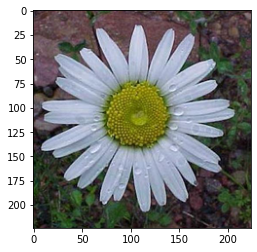

In [121]:
plt.imshow(x_test[9])

Convert image from BGR to RGB

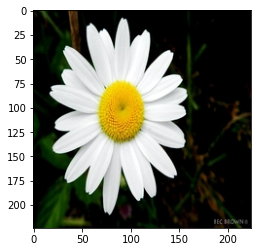

In [127]:
rgb = cv2.cvtColor(img_pred_resize, cv2.COLOR_BGR2RGB)
plt.imshow(rgb, cmap = plt.cm.Spectral)

Side by side comparison of the images 

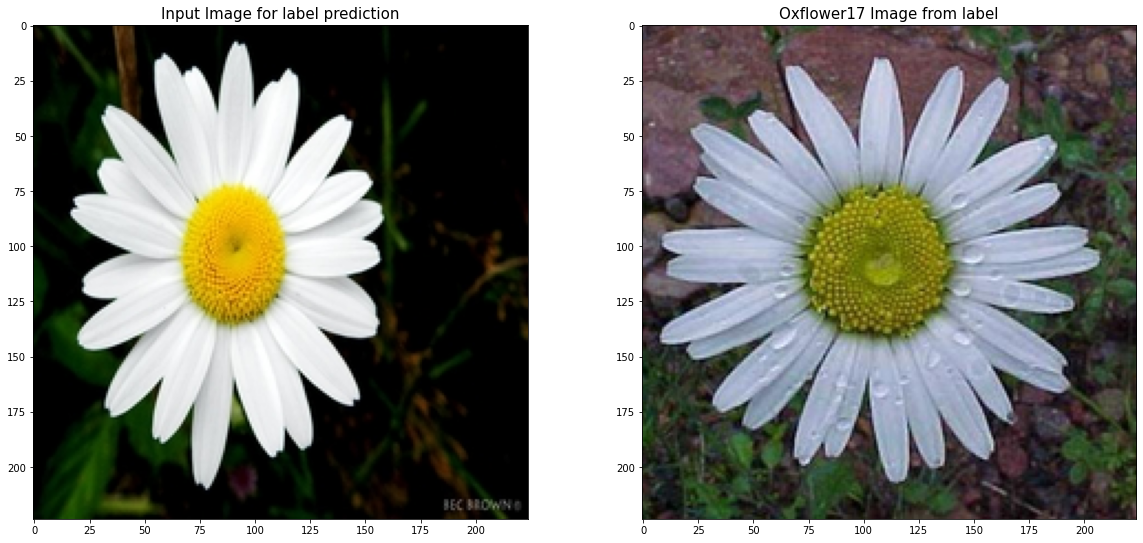

In [128]:
plt.figure(figsize = (20,20)) 
ax1 = plt.subplot(2,2,1);
plt.title('Input Image for label prediction',fontsize = 15)
plt.imshow(rgb)

ax2 = plt.subplot(2,2,2);
plt.title('Oxflower17 Image from label',fontsize = 15)
plt.imshow(x_test[9])

The prediction by the CNN model on the flower image is accurate as a sunflower from oxflower17 dataset is displayed on finding the image for the predicted label. Hence, the CNN model is fit for production and can be used for classification of other flowers using oxflower17 dataset.